The following is some introduction to RKHS regression in Python, available from https://github.com/PCAubin/RKHS/blob/master/IntroductionRKHS-121018.ipynb.

0.6079550736499867


Text(0.5, 1.0, 'Effect of regularization on KRR')

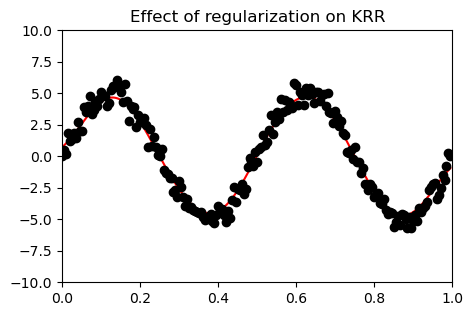

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

# number of points
number_pts=200

# sigma of the Gaussian kernel
sigma_kernel=0.1
t = np.arange(0.0, 1.0, 1./number_pts)

mu, sigma_noise = 0, 0.5 # mean and standard deviation
noise = np.random.normal(mu, sigma_noise, t.size)

a0 = 5
f0 = 2
lmbda0=1E-2
s = a0*np.sin(2*np.pi*f0*t)+noise

# Construct the Gaussian kernels
from scipy.spatial.distance import pdist, squareform

## pdist: pairwise distance between points, return a vector
## squareform: convert a vector-form distances to a square-form distance matrix
pairwise_sq_dists = squareform(pdist(np.reshape(t,[-1,1]), 'sqeuclidean'))
K = np.exp(-pairwise_sq_dists / sigma_kernel**2)

sapprox = np.dot(K,np.linalg.solve(K+lmbda0*t.size*np.eye(t.size), s))
print(np.sqrt(np.mean((sapprox - s)**2)))


l1, = plt.plot(t, sapprox,'r-')
l, = plt.plot(t, s,'ko')
plt.axis([0, 1, -10, 10])

plt.title('Effect of regularization on KRR')


In [129]:
import numpy as np
from scipy.spatial.distance import pdist, cdist, squareform

N_train = N_test = 1000
d = 2

X = np.random.uniform(size=(N_train + N_test,d))
X_train = X[:N_train,:]
X_test = X[N_train:,]
Y = np.zeros(N_train+N_test) 


a0 = 5
b0 = 2
mu, sigma_noise = 0, 0.5 # mean and standard deviation
noise = np.random.normal(mu, sigma_noise, N_train + N_test)

# y = a0 * sin(2*pi*b0*x1) + epsilon
Y = a0*np.sin(2*np.pi*b0*X[:,0])+noise
Y_train = Y[:N_train]
Y_test = Y[N_train:]

In [130]:
### MCAR ((1 − p)-homogeneous missingness) ###
p_homo = 0.7
O_train = np.random.choice(2,size=(N_train,d),p=(1-p_homo,p_homo))


In [133]:
# Complete Case
complete_case_idx = np.all(O_train == 1, axis=1)
X_train_complete = X_train[complete_case_idx]
Y_train_complete = Y_train[complete_case_idx]
N_train_complete = X_train_complete.shape[0]


sigma_kernel = 0.1
lmbda0 = 1E-2

pairwise_sq_dists = squareform(pdist(X_train_complete, 'sqeuclidean'))
K = np.exp(-pairwise_sq_dists / sigma_kernel**2)

alpha_hat = np.linalg.solve(K+lmbda0*np.eye(N_train_complete), Y_train_complete)

Y_train_complete_approx = np.dot(K, alpha_hat)

## RMSE of the fitted values in the complete case
print('RMSE of fitted values is', np.sqrt(np.mean((Y_train_complete_approx - Y_train_complete)**2)))


### Prediction ###
Y_test_complete_pred = np.zeros(N_test)

pairwise_sq_dists_pred = cdist(X_test, X_train_complete, 'sqeuclidean')
K_new = np.exp(-pairwise_sq_dists_pred / sigma_kernel**2)

Y_test_complete_pred = np.dot(K_new, alpha_hat)
    
print('RMSE of test data is', np.sqrt(np.mean((Y_test_complete_pred - Y_test)**2)))

RMSE of fitted values is 0.34888047180461546
RMSE of test data is 0.6471002441512756


In [ ]:
# Mean Imputation

In [ ]:
# Directly using available cases